# Exploratory Data Analysis


## 1. Libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Reading data

In [86]:
df = pd.read_parquet('cleaned_data/df_combined.parquet')

In [87]:
df

,in_reply_to_user_id,reply_settings,author_id,context_annotations,id,text,edit_controls,referenced_tweets,created_at,edit_history_tweet_ids,...,links,hashtags,retweet_count,reply_count,like_count,quote_count,impression_count,text_clean_en,text_clean_en_demojized,name
0,3.751469e+08,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846277256509116672,"@donaldtusk Niezrealizowanie większości ze ""10...",{'editable_until': '2024-10-15 20:49:34+00:00'...,"[{'id': '1846091776269963695', 'type': 'replie...",2024-10-15 19:49:34+00:00,[1846277256509116623],...,[],[],3,1,33,0,1555,"Failure to implement most of the ""100 specifi...","Failure to implement most of the ""100 specifi...",Bartłomiej Pejo
1,NaN,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846222583898784000,Rok po wyborach trzeba powiedzieć jedno - nie ...,{'editable_until': '2024-10-15 17:12:19+00:00'...,None,2024-10-15 16:12:19+00:00,[1846222583898784025],...,[https://t.co/4Jh5Ni6sgr],[],9,2,72,0,3031,"A year after the elections, one thing must be ...","A year after the elections, one thing must be ...",Bartłomiej Pejo
2,NaN,everyone,1.182212e+09,None,1846161400328028160,"❌ Mamy rok po wyborach, a Polska pogrąża się ...",{'editable_until': '2024-10-15 13:09:12+00:00'...,None,2024-10-15 12:09:12+00:00,[1846161400328028272],...,"[https://t.co/zFk5QLd1em, https://t.co/bRV4y07...",[],4,3,33,2,8636,"❌ We are a year after the elections, and Pola...",:cross_mark: We are a year after the election...,Bartłomiej Pejo
3,NaN,everyone,1.182212e+09,None,1846091824101769472,Mija rok od wyborów parlamentarnych. W kampani...,{'editable_until': '2024-10-15 08:32:44+00:00'...,None,2024-10-15 07:32:44+00:00,[1846091824101769490],...,"[https://t.co/rtVu3Bh43G, https://t.co/8Q3LME6...",[],6,2,38,0,2441,A year has passed since the parliamentary elec...,A year has passed since the parliamentary elec...,Bartłomiej Pejo
4,NaN,everyone,1.182212e+09,None,1846075343188144128,#Idę11 🇵 🇱 https://t.co/KiCe5ATOpX,{'editable_until': '2024-10-15 07:27:14+00:00'...,None,2024-10-15 06:27:14+00:00,[1846075343188144153],...,[https://t.co/KiCe5ATOpX],[#Idę11],45,18,616,2,8634,#I'm going11 🇵 🇱,#I'm going11 🇵 🇱,Bartłomiej Pejo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11452,1.557599e+18,everyone,1.631975e+08,None,1714536050096296192,@Marek83406343 @tvn24rozmowa @KonradPiasecki @...,{'editable_until': '2023-10-18 07:57:03+00:00'...,"[{'id': '1714524300458201553', 'type': 'replie...",2023-10-18 06:57:03+00:00,[1714536050096296256],...,[],[],0,0,1,0,22,There are people with different worldviews and...,There are people with different worldviews and...,Urszula Pasławska
11453,NaN,everyone,1.631975e+08,None,1714531739610075392,Będę namawiała kolegów z opozycji do skorzysta...,{'editable_until': '2023-10-18 07:39:55+00:00'...,None,2023-10-18 06:39:55+00:00,[1714531739610075435],...,[],[#PiS],6,1,33,0,806,I will encourage my colleagues from the opposi...,I will encourage my colleagues from the opposi...,Urszula Pasławska
11454,NaN,everyone,1.631975e+08,[{'domain': {'description': 'Brands and Compan...,1714523500176637952,Budżet państwa musi być uchwalony do końca sty...,{'editable_until': '2023-10-18 07:07:11+00:00'...,None,2023-10-18 06:07:11+00:00,[1714523500176638070],...,[https://t.co/BzsRxbPYv4],[],6,3,16,0,660,The state budget must be adopted by the end of...,The state budget must be adopted by the end of...,Urszula Pasławska
11455,NaN,everyone,1.631975e+08,None,1714186262041510400,Dziękuję z całego serca &lt;3 #DobraGospodyni ...,{'editable_until': '2023-10-17 08:47:07+00:00'...,None,2023-10-17 07:47:07+00:00,[1714186262041510351],...,[https://t.co/cpxQaIsGty],[#DobraGospodyni],15,13,122,0,4535,Thank you with all my heart &lt;3 #GoodHousewife,Thank you with all my heart &lt;3 #GoodHousewife,Urszula Pasławska


## 3. Exploratory Data Analysis

### 3.1 Categories of tweets

category
Original    8235
Reply       1852
Quote       1370
Name: count, dtype: int64
Total tweets: 11457


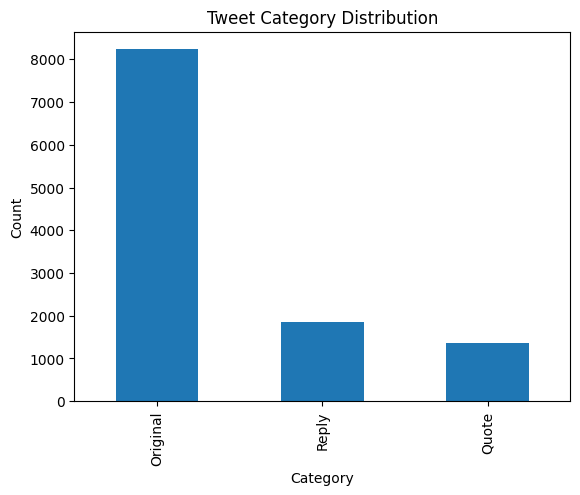

In [88]:
# Plot the category summary as a bar plot
category_summary = df['category'].value_counts()
print(category_summary)
total_tweets = category_summary.sum()
print(f"Total tweets: {total_tweets}")

category_summary.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Tweet Category Distribution')
plt.show()

### 3.2 The most active users

#### 3.2.1 General (all posts)

name
Patryk Jaki                  1023
Bartłomiej Pejo               963
Włodzimierz Skalik            949
Michał Wójcik                 781
Witold Tumanowicz             749
Sławomir Mentzen              720
Mateusz Morawiecki            646
Beata Szydło                  555
Agnieszka Okła-Drewnowicz     455
Robert Biedroń                452
Name: count, dtype: int64


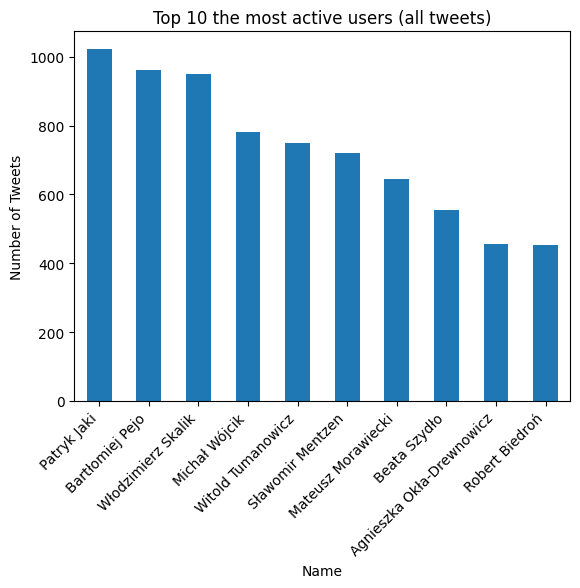

In [89]:
top_ten_users = df['name'].value_counts().head(10)
print(top_ten_users)
top_ten_users.plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Number of Tweets')
plt.title('Top 10 the most active users (all tweets)')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 3.2.2 General (only original posts)

name
Bartłomiej Pejo              835
Michał Wójcik                646
Patryk Jaki                  638
Mateusz Morawiecki           563
Sławomir Mentzen             556
Włodzimierz Skalik           521
Beata Szydło                 510
Witold Tumanowicz            490
Władysław Kosiniak-Kamysz    403
Robert Biedroń               388
Name: count, dtype: int64


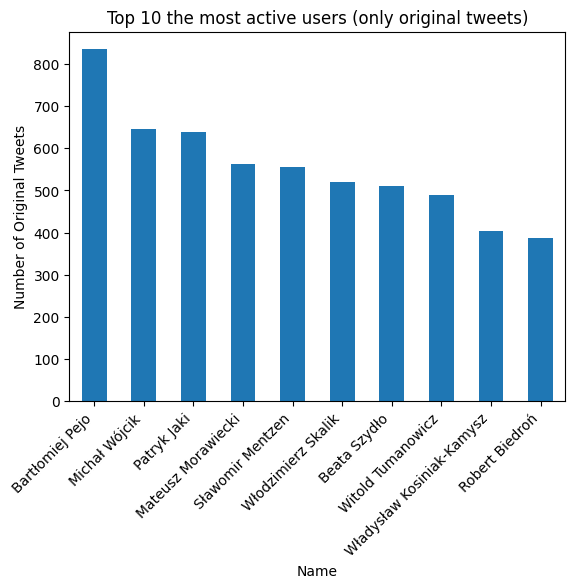

In [90]:
# Filter the dataframe to include only original posts
original_posts_df = df[df['category'] == 'Original']

# Get the top ten users based on the number of original posts
top_ten_original_users = original_posts_df['name'].value_counts().head(10)
print(top_ten_original_users)
top_ten_original_users.plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Number of Original Tweets')
plt.title('Top 10 the most active users (only original tweets)')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 3.2.3 The most active users for party (all tweets)

          party                       name  counts
0  Konfederacja            Bartłomiej Pejo     963
1            NL             Robert Biedroń     452
2           PIS                Patryk Jaki    1023
3        PL2050       Katarzyna Pelczyńska     225
4            PO  Agnieszka Okła-Drewnowicz     455
5           PSL  Władysław Kosiniak-Kamysz     408


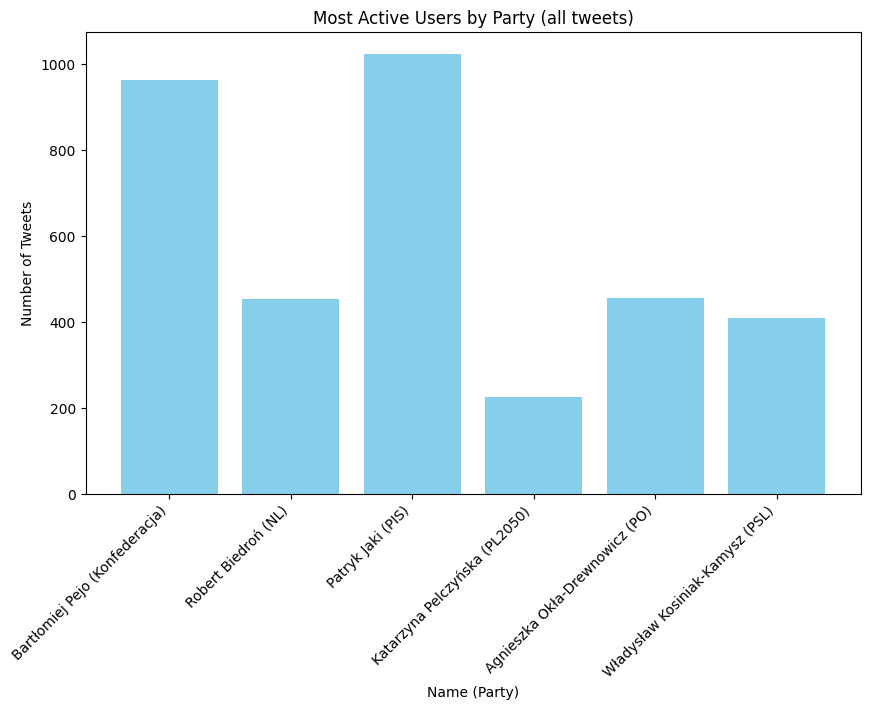

In [91]:
most_active_users = df.groupby('party')['name'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'name']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'name'])
print(most_active_users_with_counts)
plt.figure(figsize=(10, 6))
plt.bar(most_active_users_with_counts['name'], most_active_users_with_counts['counts'], color='skyblue')
plt.xlabel('Name (Party)')
plt.ylabel('Number of Tweets')
plt.title('Most Active Users by Party (all tweets)')
plt.xticks(rotation=45, ha='right')
labels = most_active_users_with_counts.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

#### 3.2.4 The most active users for party (only original tweets)

          party                       name  counts
0  Konfederacja            Bartłomiej Pejo     963
1            NL             Robert Biedroń     452
2           PIS              Michał Wójcik     781
3        PL2050       Katarzyna Pelczyńska     225
4            PO                Donald Tusk     337
5           PSL  Władysław Kosiniak-Kamysz     408


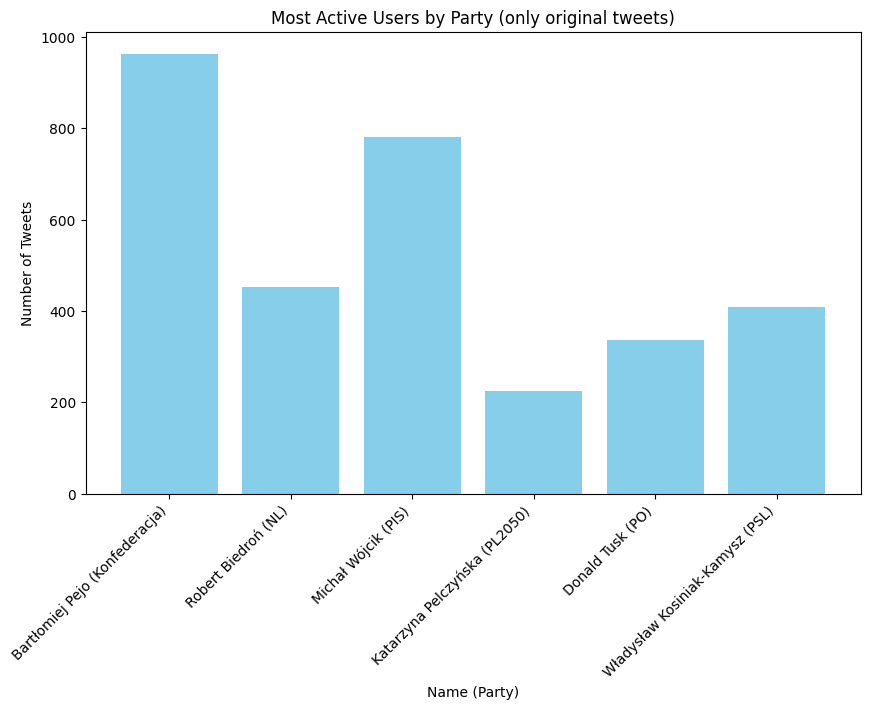

In [92]:
most_active_users = original_posts_df.groupby('party')['name'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'name']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'name'])
print(most_active_users_with_counts)
plt.figure(figsize=(10, 6))
plt.bar(most_active_users_with_counts['name'], most_active_users_with_counts['counts'], color='skyblue')
plt.xlabel('Name (Party)')
plt.ylabel('Number of Tweets')
plt.title('Most Active Users by Party (only original tweets)')
plt.xticks(rotation=45, ha='right')
labels = most_active_users_with_counts.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

### 3.3 Number of tweets per Party 

### 3.3.1 All tweets

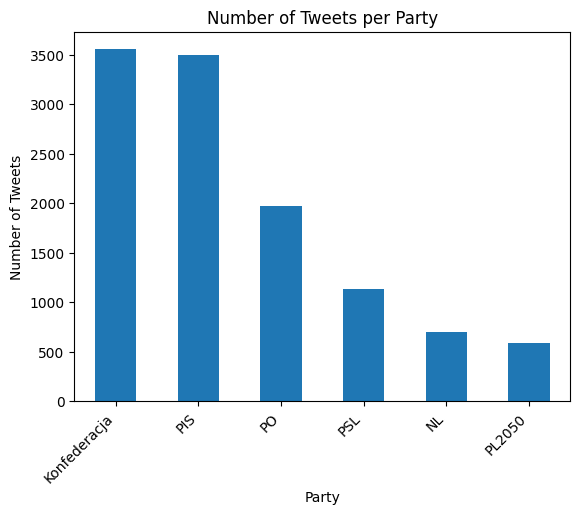

In [93]:
tweets_per_party = df['party'].value_counts()
tweets_per_party.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Party')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 3.3.2 Only original tweets

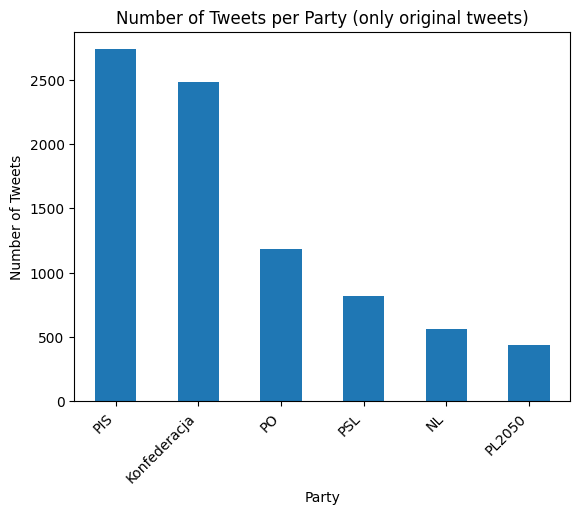

In [94]:
tweets_per_party = original_posts_df['party'].value_counts()
tweets_per_party.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Party (only original tweets)')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3.4 Publication time analysis 

#### 3.4.1 General

Spike around euroelection

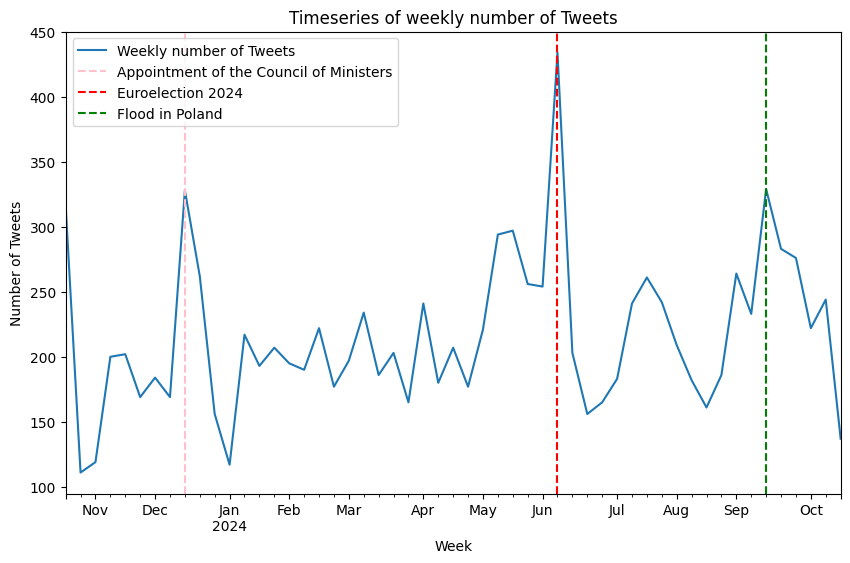

created_at
2024-06-09 00:00:00+00:00    434
2024-09-15 00:00:00+00:00    329
2023-12-17 00:00:00+00:00    328
2023-10-22 00:00:00+00:00    316
2024-05-19 00:00:00+00:00    297
dtype: int64


In [161]:
df['created_at'] = pd.to_datetime(df['created_at'])
df_time = df.copy()
df_time.set_index('created_at', inplace=True)
weekly_tweets = df_time.resample('W').size()
weekly_tweets.plot(kind='line', figsize=(10, 6), label='Weekly number of Tweets')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Timeseries of weekly number of Tweets')
council_date = pd.to_datetime('2023-12-13')
plt.axvline(x=council_date, color='pink', linestyle='--', label='Appointment of the Council of Ministers')
euroelection_date = pd.to_datetime('2024-06-09')
plt.axvline(x=euroelection_date, color='red', linestyle='--', label='Euroelection 2024')
flood_date = pd.to_datetime('2024-09-15')
plt.axvline(x=flood_date, color='green', linestyle='--', label='Flood in Poland')
plt.legend()
plt.show()
weekly_tweets_sorted = weekly_tweets.sort_values(ascending=False)
print(weekly_tweets_sorted.head(5))

We can observe that peeks overlap with important political events.

#### 3.4.2 By Party

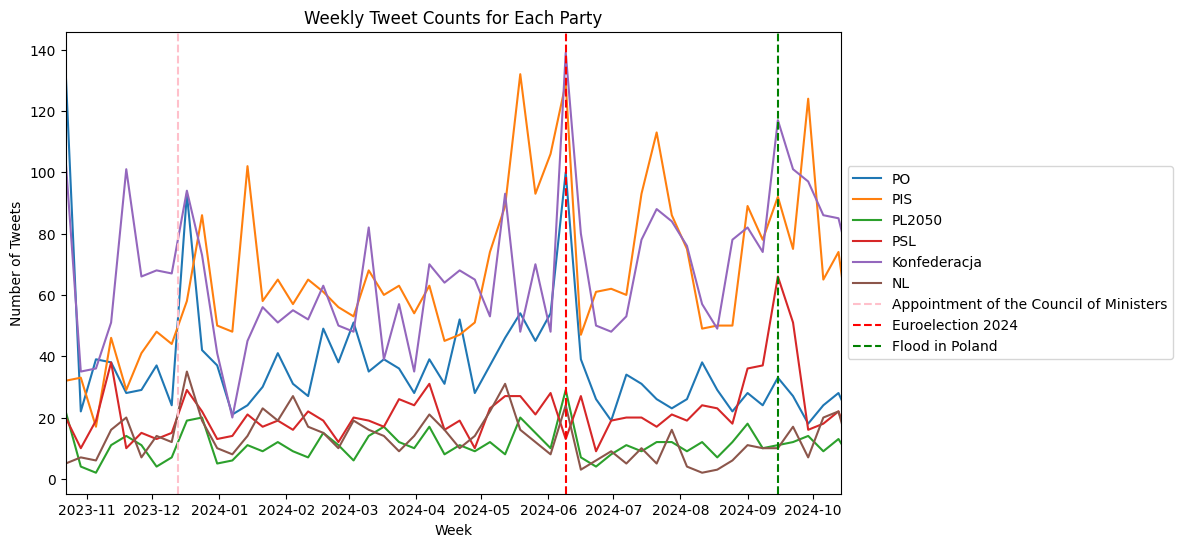

In [185]:
df_time_sorted = df_time.sort_index()
df_time_sorted['created_at'] = pd.to_datetime(df_time_sorted.index)
df_time_sorted.set_index('created_at', inplace=True)
parties = df_time_sorted['party'].unique()
plt.figure(figsize=(10, 6))
for party in parties:
    party_df = df_time_sorted[df_time_sorted['party'] == party]
    weekly_tweets = party_df.resample('W').size()
    plt.plot(weekly_tweets, label=party)
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Weekly Tweet Counts for Each Party')

plt.xlim(pd.to_datetime('2023-10-22'), pd.to_datetime('2024-10-14'))
council_date = pd.to_datetime('2023-12-13')
plt.axvline(x=council_date, color='pink', linestyle='--', label='Appointment of the Council of Ministers')
euroelection_date = pd.to_datetime('2024-06-09')
plt.axvline(x=euroelection_date, color='red', linestyle='--', label='Euroelection 2024')
flood_date = pd.to_datetime('2024-09-15')
plt.axvline(x=flood_date, color='green', linestyle='--', label='Flood in Poland')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


We can observe that PO was the most active party after the parliamentary election and the appointment of the Council of Ministers. During the Euroelection, PIS and Konfederacja were more active. During the flood, there was a significant gap in activity between Konfederacja and PIS compared to other parties.

### 3.5 Average number of words in tweets

#### 3.5.1 By category

   category  word_count
0  Original   26.097784
1     Quote   16.221699
2     Reply   15.334375


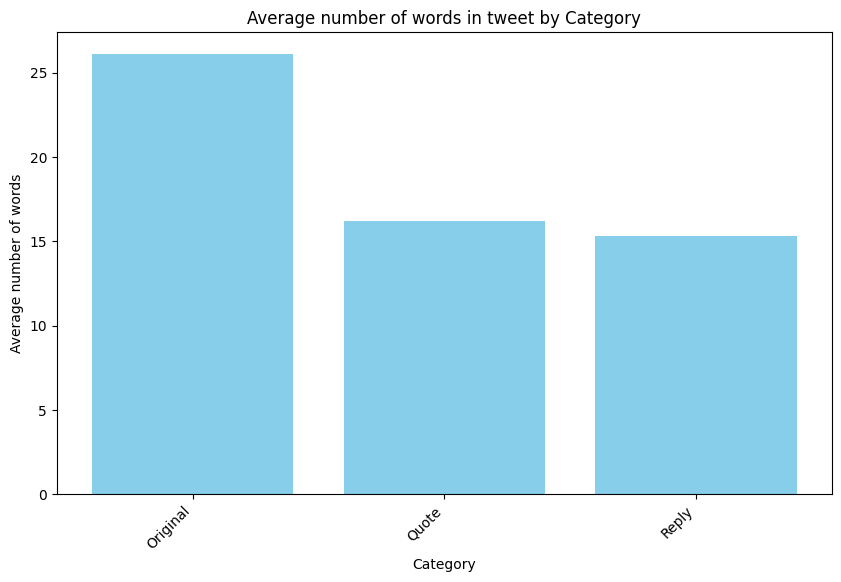

In [219]:
df['word_count'] = df['text_clean'].apply(lambda x: len(x.split()))

user_word_count_summary = df.groupby(['party', 'username', 'category'])['word_count'].mean().reset_index()

category_word_count_summary = user_word_count_summary.groupby(['category'])['word_count'].mean().reset_index()
print(category_word_count_summary)

plt.figure(figsize=(10, 6))
plt.bar(category_word_count_summary['category'], category_word_count_summary['word_count'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average number of words')
plt.title('Average number of words in tweet by Category')
plt.xticks(rotation=45, ha='right')
plt.show()

As expected, original tweets are the longest type of posts on average.

#### 3.5.2 By party

          party  word_count
2           PIS   25.171355
3        PL2050   25.079791
5           PSL   23.844432
0  Konfederacja   22.445324
4            PO   19.843750
1            NL   19.094989


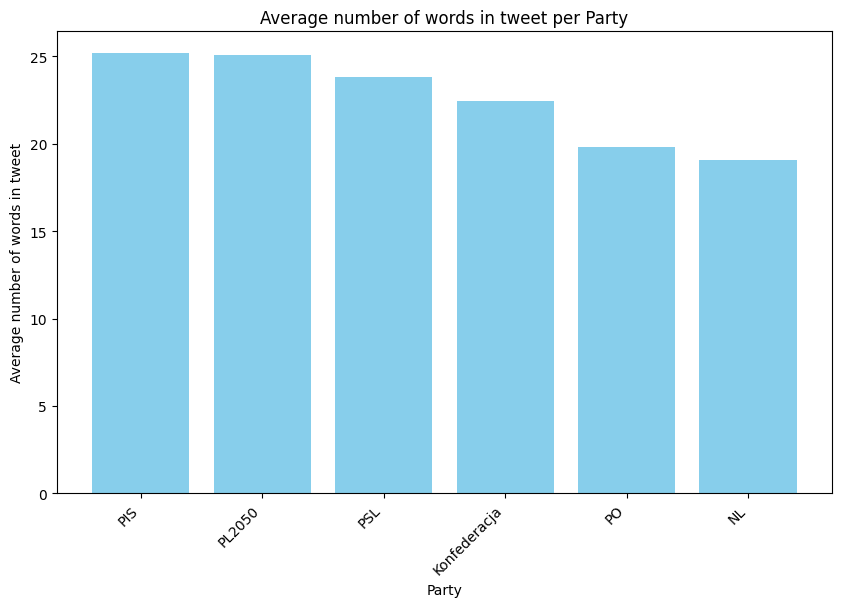

In [218]:
party_user_word_count_summary = user_word_count_summary.groupby('party')['word_count'].mean().reset_index()
party_user_word_count_summary = party_user_word_count_summary.sort_values(by='word_count', ascending=False)
print(party_user_word_count_summary)
plt.figure(figsize=(10, 6))
plt.bar(party_user_word_count_summary['party'], party_user_word_count_summary['word_count'], color='skyblue')
plt.xlabel('Party')
plt.ylabel('Average number of words in tweet')
plt.title('Average number of words in tweet per Party')
plt.xticks(rotation=45, ha='right')
plt.show()

We can observe that politicians from PIS tend to write the longest posts, while those from NL generally prefer shorter ones. However, it is worth noting that the difference in the average number of words is only 5, which is around 25% of the average post length.

#### 3.5.3 By user

     party                       name  word_count
11     PIS           Mariusz Kamiński   33.664894
31     PSL  Władysław Kosiniak-Kamysz   32.678922
16  PL2050       Katarzyna Pelczyńska   32.475556
23      PO                 Ewa Kopacz   30.509091
28     PSL           Dariusz Klimczak   28.529630
18  PL2050            Szymon Hołownia   28.048193
9      PIS               Beata Szydło   27.745946
29     PSL           Krzysztof Hetman   25.722222
12     PIS         Mateusz Morawiecki   25.218266
10     PIS             Elżbieta Witek   24.697368


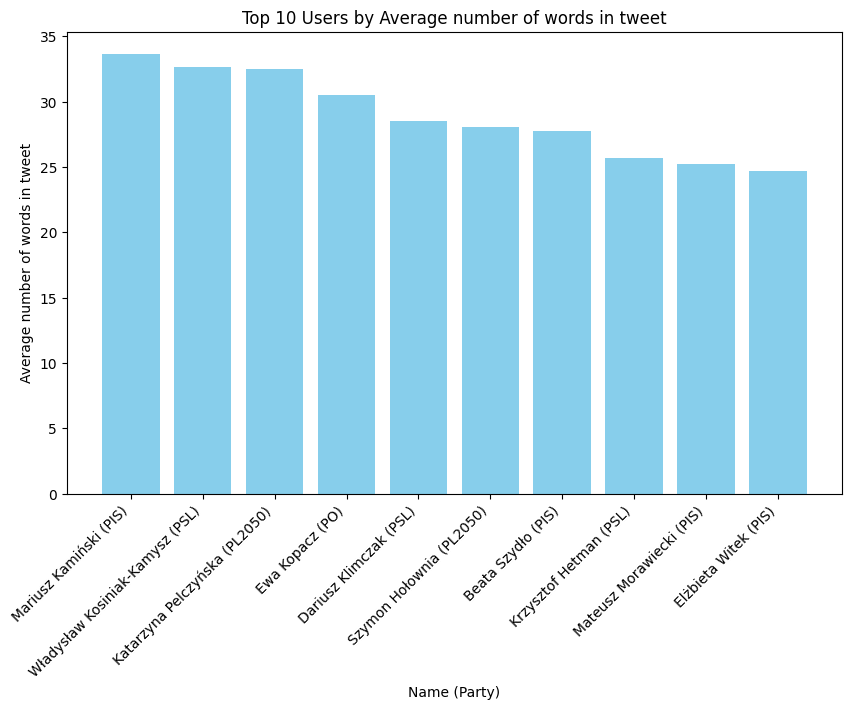

In [221]:
# Merge the user_word_count_summary with the original dataframe to get the party affiliation and name
user_word_count_summary = df.groupby(['party', 'name'])['word_count'].mean().reset_index()

# Order by word count and get the top 10
top_10_word_count = user_word_count_summary.sort_values(by='word_count', ascending=False).head(10)
print(top_10_word_count)

# Plot the top 10 users by word count
plt.figure(figsize=(10, 6))
plt.bar(top_10_word_count['name'] + ' (' + top_10_word_count['party'] + ')', top_10_word_count['word_count'], color='skyblue')
plt.xlabel('Name (Party)')
plt.ylabel('Average number of words in tweet')
plt.title('Top 10 Users by Average number of words in tweet')
plt.xticks(rotation=45, ha='right')
plt.show()


We can observe that the number of words used in tweets is not entirely dependent on the party affiliation. It appears to be more of a personal characteristic. However, it is interesting to note that none of the top 10 users by average number of words per tweet are from Konfederacja.

#### 3.5.4 Histograms per party

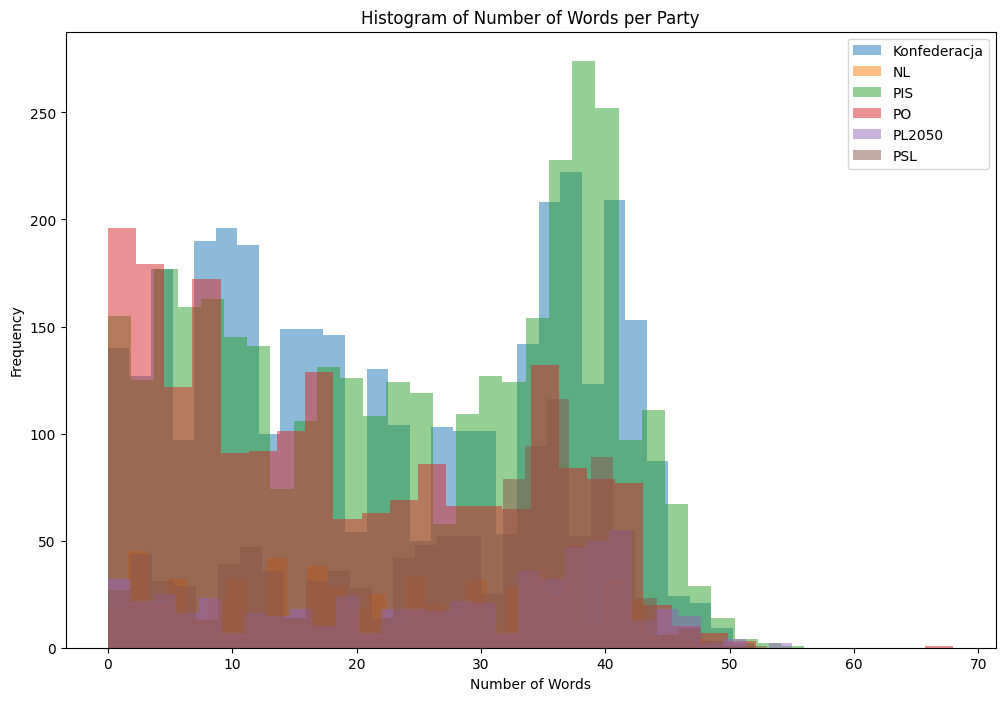

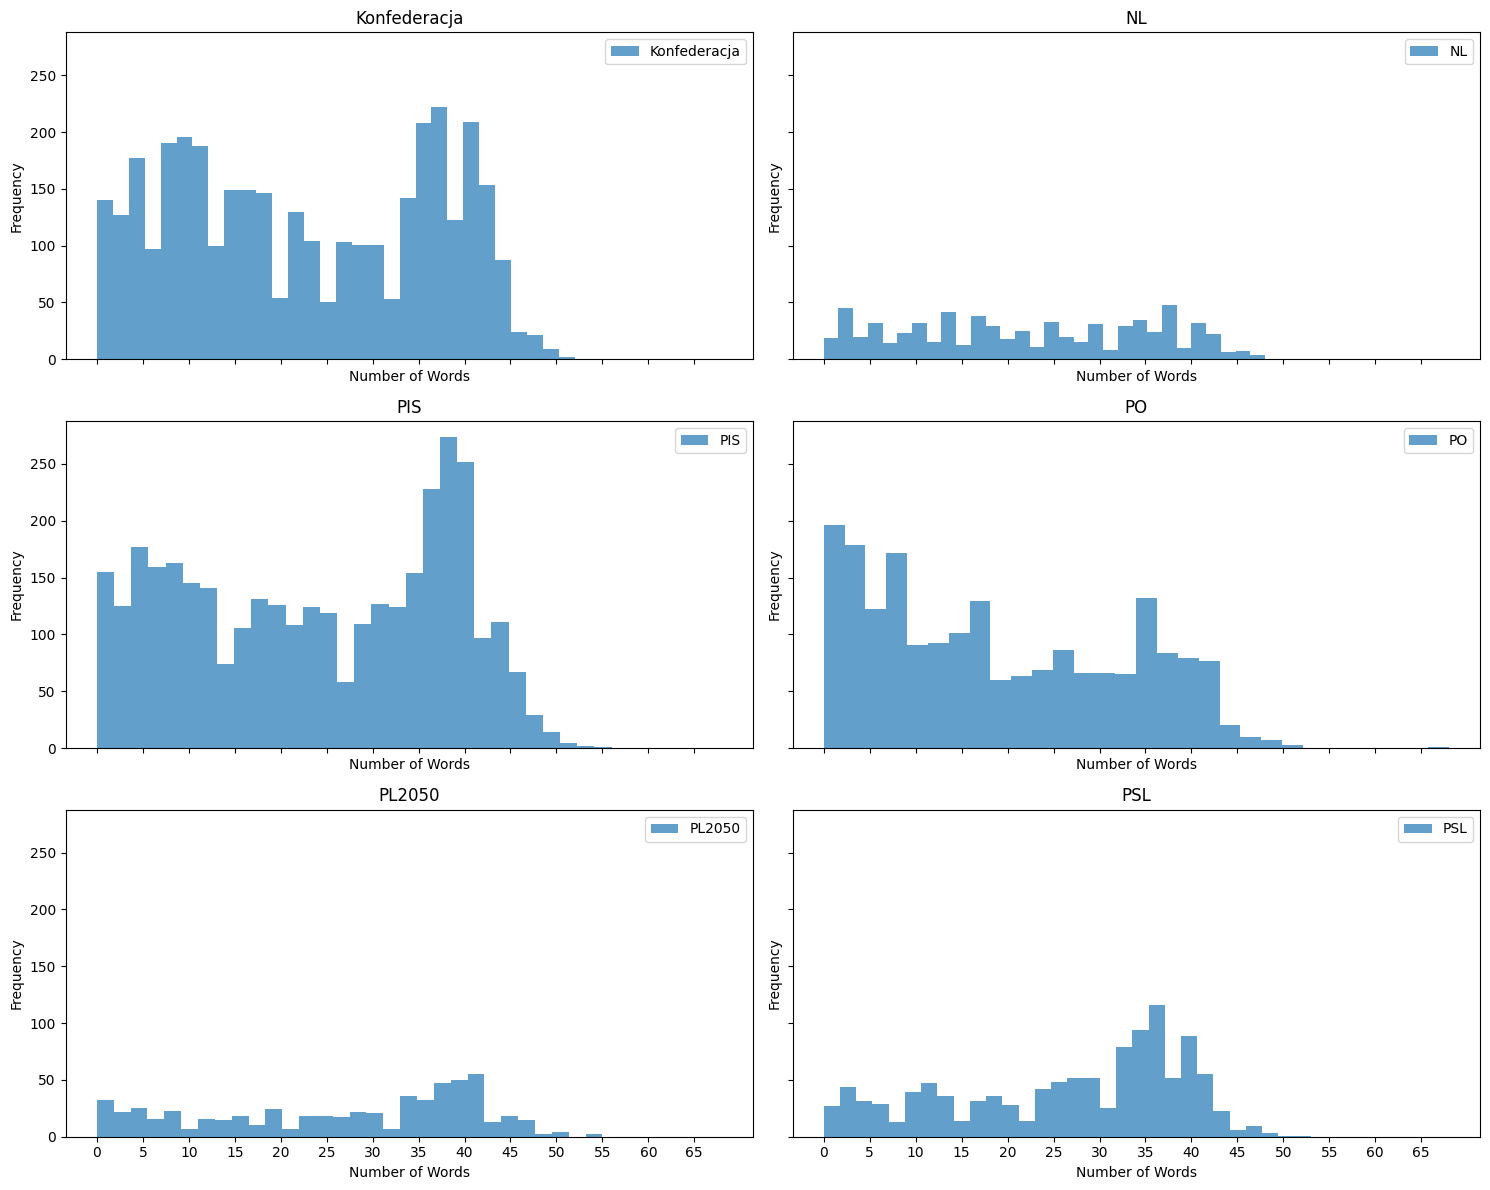

In [223]:
parties = df['party'].unique()
plt.figure(figsize=(12, 8))

for party in parties:
    plt.hist(df[df['party'] == party]['word_count'], bins=30, alpha=0.5, label=party)

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words per Party')
plt.legend()
plt.show()
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, party in enumerate(parties):
    axes[i].hist(df[df['party'] == party]['word_count'], bins=30, alpha=0.7, label=party)
    axes[i].set_title(f'{party}')
    axes[i].set_xlabel('Number of Words')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_xticks(range(0, df['word_count'].max() + 1, 5))  # Set x-axis scale

plt.tight_layout()
plt.show()


We can observe that the most common tweet lengths are very short, up to 5 words, and around 10 words. Interestingly, there is also a notable peak at around 40 words. Each party shows a significant number of tweets with approximately 40 words.

In [31]:
# Calculate the number of characters in each post
df['char_count'] = df['text_clean'].apply(len)

# Group by party and category, then calculate the average number of characters
char_count_summary = df.groupby(['party', 'category'])['char_count'].mean().reset_index()

# Rename the columns for clarity
char_count_summary.columns = ['party', 'category', 'average_char_count']

# Display the summary
print(char_count_summary)

     party  category  average_char_count
0    Konfa  Original          182.997987
1    Konfa     Quote          109.893733
2    Konfa     Reply           87.210227
3       NL  Original          169.507092
4       NL     Quote           84.557377
5       NL     Reply           52.880000
6      PIS  Original          169.256213
7      PIS     Quote          165.505837
8      PIS     Reply          117.807087
9   PL2050  Original          208.954751
10  PL2050     Quote          134.915254
11  PL2050     Reply           76.472527
12      PO  Original          164.323802
13      PO     Quote           88.828054
14      PO     Reply           62.885714
15     PSL  Original          217.084146
16     PSL     Quote          103.013514
17     PSL     Reply          125.404762
18     PSL   Retweet           98.250000


In [32]:
import emoji

# Create a function to count emojis in a text
def count_emojis(text):
    return sum(1 for char in text if char in emoji.EMOJI_DATA)

# Add the 'emoji_count' column to the dataframe
df['emoji_count'] = df['text_clean'].apply(count_emojis)

# Calculate the total number of emojis in the 'text' column per unique value in the 'party' column
emoji_counts_per_party = df.groupby('party')['emoji_count'].sum().reset_index()
emoji_counts_per_party.columns = ['party', 'total_emoji_count']

print(emoji_counts_per_party)
# Calculate the average number of emojis per post for each party
average_emoji_per_post_per_party = df.groupby('party')['emoji_count'].mean().reset_index()
average_emoji_per_post_per_party.columns = ['party', 'average_emoji_per_post']

print(average_emoji_per_post_per_party)

    party  total_emoji_count
0   Konfa               1696
1      NL                727
2     PIS               1390
3  PL2050                121
4      PO               1709
5     PSL                811
    party  average_emoji_per_post
0   Konfa                0.477075
1      NL                1.038571
2     PIS                0.396689
3  PL2050                0.204392
4      PO                0.867513
5     PSL                0.711404


In [33]:
# Extract public metrics into separate columns
df['retweet_count'] = df['public_metrics'].apply(lambda x: x['retweet_count'])
df['reply_count'] = df['public_metrics'].apply(lambda x: x['reply_count'])
df['like_count'] = df['public_metrics'].apply(lambda x: x['like_count'])
df['quote_count'] = df['public_metrics'].apply(lambda x: x['quote_count'])

# Group by party and calculate the sum of each metric
public_metrics_summary = df.groupby('party')[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum().reset_index()

# Get the total number of posts for each party
total_posts_per_party = df['party'].value_counts().reset_index()
total_posts_per_party.columns = ['party', 'total_posts']

# Merge the public metrics summary with the total posts per party
public_metrics_summary = public_metrics_summary.merge(total_posts_per_party, on='party')

# Normalize the metrics per number of posts
public_metrics_summary['retweet_count_per_post'] = public_metrics_summary['retweet_count'] / public_metrics_summary['total_posts']
public_metrics_summary['reply_count_per_post'] = public_metrics_summary['reply_count'] / public_metrics_summary['total_posts']
public_metrics_summary['like_count_per_post'] = public_metrics_summary['like_count'] / public_metrics_summary['total_posts']
public_metrics_summary['quote_count_per_post'] = public_metrics_summary['quote_count'] / public_metrics_summary['total_posts']

print(public_metrics_summary[['party', 'retweet_count_per_post', 'reply_count_per_post', 'like_count_per_post', 'quote_count_per_post']])

    party  retweet_count_per_post  reply_count_per_post  like_count_per_post  \
0   Konfa               52.355274             64.246132           782.412940   
1      NL               25.692857             89.512857           342.064286   
2     PIS              299.674943            384.872146          1088.127854   
3  PL2050               93.248311            369.371622          1149.081081   
4      PO              343.383756            459.712690          2599.544670   
5     PSL               39.607895            182.473684           393.575439   

   quote_count_per_post  
0              4.548523  
1              6.465714  
2             16.163242  
3             21.464527  
4             39.680203  
5             10.243860  


In [34]:
# Create a new dataframe with 'id' and 'text_clean' columns
df_clean_text = df[['id', 'text_clean']]

# Export the dataframe to a CSV file
df_clean_text.to_csv('clean_text_data.csv', index=False)

ID ZAPISUJE SIE JAKO FLOAT I NIE ODCZYTIJE SIE DOBRZE Z CSV STAD ZMIANA NA STRING

In [35]:
# Read the clean_text_data.csv file into a DataFrame
df_clean_text = pd.read_csv('data/clean_text_en.csv', dtype={'id': str})

# Display the first few rows of the DataFrame
df_clean_text.head()


,id,text_clean,text_clean_en
0,1.84626774302233e+18,"""Ani kroku wstecz!"" - w przód też żadnego jak...","""Not a step back!"" - you haven't put any forw..."
1,1.8462647773471176e+18,Właśnie zadzwonił do mnie nieznany numer. Już ...,An unknown number just called me. I thought it...
2,1.8462626933945882e+18,"Czy ""jeszcze cięższa praca"" przełoży się na r...","Will ""even harder work"" translate into the fu..."
3,1.8462613413274463e+18,Polecam się zapoznać z treścią konferencji 👇,I recommend reading the content of the confere...
4,1.8461048658290156e+18,❌ Kilka dni temu zagłosowałem za odwołani...,"❌ A few days ago, I voted to dismiss Krzysz..."


In [36]:
# Change the type of 'id' column to float
df['id'] = df['id'].astype('string')

In [37]:
# Ensure the 'text_clean_en' column exists in df_clean_text
if 'text_clean_en' in df_clean_text.columns:
    # Merge the 'text_clean_en' column from df_clean_text to df based on the 'id' column
    df = df.merge(df_clean_text[['id', 'text_clean_en']], on='id', how='left')

    # Display the first few rows of the updated dataframe to verify the merge
    display(df.head())
else:
    print("Column 'text_clean_en' does not exist in df_clean_text")


,id,possibly_sensitive,in_reply_to_user_id,referenced_tweets,edit_controls,entities,text,public_metrics,edit_history_tweet_ids,reply_settings,...,text_utf,text_clean,word_count,char_count,emoji_count,retweet_count,reply_count,like_count,quote_count,text_clean_en
0,1.84626774302233e+18,False,509272614.0,"[{'type': 'replied_to', 'id': '184615588116918...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@Dariusz_Jonski ""Ani kroku wstecz!"" - w przód ...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1846267743022330183],everyone,...,"b'@Dariusz_Jonski ""Ani kroku wstecz!"" - w prz\...","""Ani kroku wstecz!"" - w przód też żadnego jak...",12,67,0,0,1,13,0,"""Not a step back!"" - you haven't put any forw..."
1,1.8462647773471176e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",NaN,Właśnie zadzwonił do mnie nieznany numer. Już ...,"{'retweet_count': 28, 'reply_count': 9, 'like_...",[1846264777347117471],everyone,...,b'W\xc5\x82a\xc5\x9bnie zadzwoni\xc5\x82 do mn...,Właśnie zadzwonił do mnie nieznany numer. Już ...,23,147,0,28,9,418,0,An unknown number just called me. I thought it...
2,1.8462626933945882e+18,False,955239446.0,"[{'type': 'replied_to', 'id': '184612763211236...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@KosiniakKamysz Czy ""jeszcze cięższa praca"" pr...","{'retweet_count': 4, 'reply_count': 1, 'like_c...",[1846262693394588154],everyone,...,"b'@KosiniakKamysz Czy ""jeszcze ci\xc4\x99\xc5\...","Czy ""jeszcze cięższa praca"" przełoży się na r...",14,109,0,4,1,38,0,"Will ""even harder work"" translate into the fu..."
3,1.8462613413274463e+18,False,NaN,"[{'type': 'quoted', 'id': '1846159669573689602'}]","{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 45, 'end': 68, 'url': 'htt...",Polecam się zapoznać z treścią konferencji 👇 ...,"{'retweet_count': 9, 'reply_count': 2, 'like_c...",[1846261341327446163],everyone,...,b'Polecam si\xc4\x99 zapozna\xc4\x87 z tre\xc5...,Polecam się zapoznać z treścią konferencji 👇,7,47,1,9,2,48,0,I recommend reading the content of the confere...
4,1.8461048658290156e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 277, 'end': 300, 'url': 'h...",❌ Kilka dni temu zagłosowałem za odwołaniem K...,"{'retweet_count': 30, 'reply_count': 0, 'like_...",[1846104865829015639],everyone,...,b'\xe2\x9d\x8cKilka dni temu zag\xc5\x82osowa\...,❌ Kilka dni temu zagłosowałem za odwołaniem K...,36,282,2,30,0,141,0,"❌ A few days ago, I voted to dismiss Krzysz..."


In [38]:
# Display the breakdown of average emoji usage per party
average_emoji_per_post_per_party.set_index('party', inplace=True)
print(average_emoji_per_post_per_party)

        average_emoji_per_post
party                         
Konfa                 0.477075
NL                    1.038571
PIS                   0.396689
PL2050                0.204392
PO                    0.867513
PSL                   0.711404


In [39]:
# Replace '#VALUE!' with NaN in 'text_clean_en' column
df['text_clean_en'].replace('#VALUE!', pd.NA, inplace=True)

/var/folders/4y/59z3xr0d24q8s85gv4mfxhc00000gn/T/ipykernel_61169/373191452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text_clean_en'].replace('#VALUE!', pd.NA, inplace=True)


In [40]:
df['text_clean_en_demojized'] = df['text_clean_en'].apply(lambda x: emoji.demojize(str(x)) if pd.notnull(x) else x)

df[['text_clean_en', 'text_clean_en_demojized']].head()

,text_clean_en,text_clean_en_demojized
0,"""Not a step back!"" - you haven't put any forw...","""Not a step back!"" - you haven't put any forw..."
1,An unknown number just called me. I thought it...,An unknown number just called me. I thought it...
2,"Will ""even harder work"" translate into the fu...","Will ""even harder work"" translate into the fu..."
3,I recommend reading the content of the confere...,I recommend reading the content of the confere...
4,"❌ A few days ago, I voted to dismiss Krzysz...",":cross_mark: A few days ago, I voted to dis..."
